# [Q1] Read in data

Approach: To read the test file for gold and labels, read_csv function was used, and delimiter ="\t" was provided alongwith appropiate column names.

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
%pylab inline
path_to_file="/Users/nikitalakhotia/Desktop/msba docs/data programming/hw3/" ## Define your path
gold=pd.read_csv(path_to_file+"gold.txt", delimiter="\t", names=["url","category"]) ## reading gold dataset
print "*Gold Dataset*"
print gold[:5]
labels=pd.read_csv(path_to_file+"labels.txt", delimiter="\t", names=[ "turk",  "url","category"]) ## reading labels dataset
#labels=labels.drop_duplicates()
print "*Labels Dataset*"
print labels[:5]

Populating the interactive namespace from numpy and matplotlib
*Gold Dataset*
                                      url category
0               http://0800-horoscope.com        G
1                      http://18games.net        X
2                    http://1pixelout.net        G
3  http://1porno.com/004/teens/index.html        X
4   http://1stpussy.com/005/16/index.html        X
*Labels Dataset*
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G
4  A2LGX47NN7C5D3  http://000.cc        G


# [Q2] Split into two DataFrames

Approach: To split the dataframe into "labels on gold " and "labels unknown", a condition was given. The condition was if "url" in labels dataframe matches to "url" in gold dataset then that row was assigned to "labels on gold" dataset and the ones which didnt match was assigned to the "labels unkown" dataset.

In [34]:
labels_on_gold=labels.merge(gold, on="url", how="inner")
print labels_on_gold[:4]
labels_unknown=labels[labels["url"].isin(list(gold["url"]))==False]
print labels_unknown[:4]

             turk                        url category_x category_y
0  A1253FXHCZ9CWM  http://0800-horoscope.com          G          G
1  A153PKAL7OAY36  http://0800-horoscope.com          G          G
2  A1FV9SAPL5C6KY  http://0800-horoscope.com          G          G
3  A1JTOT0DWM6QGL  http://0800-horoscope.com          G          G
             turk            url category
0  A1OT3A29R9N1DG  http://000.cc        P
1  A1PXXEOGQ76RNJ  http://000.cc        G
2  A1PXXEOGQ76RNJ  http://000.cc        G
3  A21US576U8SCO4  http://000.cc        G


# [Q3] Compute accuracies of turks

Create a rater goodness DataFrame that is indexed by turk, and has two columns: the number of ratings, and the average correctness of ratings for each turk (both on gold set urls).

Approach: Create new variable which contains the value= 0 or 1. "0" When a particular turk is correct else "0". Then, group the dataset on turk with "count" function and save the result in new dataframe. Again group by the old dataset on turk with "mean" function and save the result in another dataframe.
Both dataframes have same index i.e. "turk", hence join the dataframes to get number of ratings and averge correctness in the same dataframe.

In [4]:
# Creating variable whose value=1 if turk is correct otherwise 0
labels_on_gold['avg_correctness'] = np.where(labels_on_gold["category_x"]==labels_on_gold["category_y"], 1,0)
rater_goodness_cnt=labels_on_gold.groupby('turk')[["url"]].count() # to get number of ratings
rater_goodness_avg=labels_on_gold.groupby('turk')[["avg_correctness"]].mean() # to get average correctness of ratings
# merging to get "# of ratings" & "average correctness" in one dataframe with turks being index
rater_goodness=rater_goodness_cnt.merge(rater_goodness_avg, how="inner", left_index=True, right_index=True) 
# renaming variable 
rater_goodness=rater_goodness.rename(columns={'url':'number_ratings'})
rater_goodness[:4]

,number_ratings,avg_correctness
turk,,
A112DVP1KG4QZU,1,1.000000
A1253FXHCZ9CWM,29,0.517241
A12CY1Q7XKJJDE,1,1.000000
A12RE8G66WTO8B,20,0.750000


# [Q4] Odds ratios

Approach: To get the odds ratio, use the formulae - (avg_correctness)/(1.001-avg_correctness).
In the denominator, average correction is subtracted by 1.001 instead of 1 to avoid infinity values.

In [5]:
rater_goodness["odds"]=rater_goodness["avg_correctness"]/(1.001-rater_goodness["avg_correctness"])
rater_goodness[:4]

,number_ratings,avg_correctness,odds
turk,,,
A112DVP1KG4QZU,1,1.000000,1000.000000
A1253FXHCZ9CWM,29,0.517241,1.069214
A12CY1Q7XKJJDE,1,1.000000,1000.000000
A12RE8G66WTO8B,20,0.750000,2.988048


# [Q5] Most accurate turks

Approach: Created a new dataframe with turks who have rated atleast more than 20 urls and sorted them on their correctness. 

In [6]:
rater_goodness_20=rater_goodness[rater_goodness["number_ratings"]>=20]
rater_goodness_20.sort_values("avg_correctness",ascending=False)[:10] 

,number_ratings,avg_correctness,odds
turk,,,
A2U0R4X38GUKZE,20,0.950000,18.627451
A22C0PJUBFJTI0,36,0.916667,10.869565
A23YQUBXZPKILZ,24,0.875000,6.944444
ATVALOQVDCMZW,103,0.854369,5.826657
A1HIXWH4OXT8S4,40,0.825000,4.687500
A3220HG1O83HQ4,22,0.818182,4.475385
A32W20KGQXS0LL,25,0.800000,3.980100
A20PWAB7G3HDHU,20,0.800000,3.980100
AJSJVK40F5HM6,28,0.785714,3.649635


# [Q6] Rating counts versus accuracy

Approach: To check if there is relationship between number of ratings by a turk and turk's accuracy, scatter was plot created using both the variables.
Insights: In the plot shown below, it is evident that accuracy of ratings by turk in not entirely dependent on number of ratings by the same turk. For example, turks with higher accuracy (around 0.9) has lower number of ratings (around 25).
Even the value of correlation between the two variable is not high (it is around 0.045)

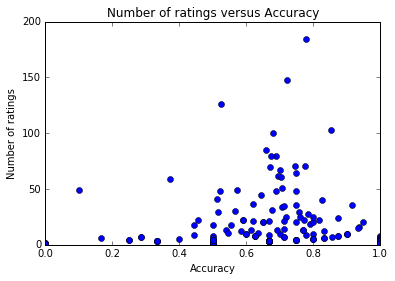

In [7]:
plot(rater_goodness['avg_correctness'], rater_goodness['number_ratings'], marker='o', color='blue', linestyle='None')
xlabel('Accuracy')
ylabel('Number of ratings')
title('Number of ratings versus Accuracy')
show()

In [8]:
import numpy ## correlation coefficient
print numpy.corrcoef(rater_goodness['avg_correctness'], rater_goodness['number_ratings'])

[[ 1.          0.04529238]
 [ 0.04529238  1.        ]]


# [Q7] Overall predicted odds

In [29]:
## filter for the 4th quantile for number of ratings
rater_goodness_75=rater_goodness[rater_goodness["number_ratings"]>rater_goodness["number_ratings"].quantile(0.75)] 
rater_goodness_75.reset_index(level=0, inplace=True) ## reset index to get turk as a column
data1=rater_goodness_75[["turk","odds"]] 
data2=pd.merge(labels_unknown, data1, how="inner", on="turk") # merging with labels_unknown to get url and category
data3=data2.groupby(['url','category'])[["odds"]].prod() # to calculte product of odds
data3=data3.reset_index() ## reset index to get url and category as columns
data3 = data3.rename(columns={'odds':'overall_odds'}) ## renaming odds as overall odds
data3[:4]

,url,category,overall_odds
0,http://0-101.net,G,2.155963
1,http://000.cc,G,1.460583
2,http://0000.jp,G,14.488244
3,http://000relationships.com,G,5.681060


# [Q8] Predicted categories

Approach: Take the resultant dataset from above part and perform groupby on url to get the maximum of overall odds for each url. 
Merge the resultant dataset with the above dataset on url and overall_odds to get the category corresponding to that maximum value of overall odd.

In [30]:
result_75=data3.groupby(['url'], sort=False)[['overall_odds']].max() # maximum value of overall odd for each url
result_75=result_75.reset_index() # reset index to get url as a column
#merge to get category corresponding to maximum value of overall odds
result_75=pd.merge(result_75, data3, how="left", on=["url","overall_odds"]) 
result_75 = result_75.rename(columns={'overall_odds':"top_odds", 'category':"top_category"}) 
result_75[:4]

,url,top_odds,top_category
0,http://0-101.net,2.155963,G
1,http://000.cc,1.460583,G
2,http://0000.jp,14.488244,G
3,http://000relationships.com,5.681060,G


# [Q9] Predicted categories using more turks

Approach: Repeat Q7 & Q8 for quantile =0.25
Merge the result_25 and result_75 on url.
Create a cross table with top category for result_25 as columns and top category for result_75 as index
Error: Ratings present in results_25 table and differ rating under result_75 table for a particular url id defined as a error. 
Most number of errors is in category G, and highest percentage of error is in category P

In [31]:
rater_goodness_25=rater_goodness[rater_goodness["number_ratings"]>rater_goodness["number_ratings"].quantile(0.25)] ## filter for 4th quantile
rater_goodness_25.reset_index(level=0, inplace=True) ##
data1_25=rater_goodness_25[["turk","odds"]]
data2_25=pd.merge(labels_unknown, data1_25, how="inner", on="turk")
data3_25=data2_25.groupby(['url','category'])[["odds"]].prod()
data3_25=data3_25.reset_index()
data3_25 =data3_25.rename(columns={'odds': 'overall_odds'})

result_25=data3_25.groupby(['url'], sort=False)[['overall_odds']].max()
result_25=result_25.reset_index()
result_25=pd.merge(result_25, data3_25, how="left", on=["url","overall_odds"])

result_25 = result_25.rename(columns={'overall_odds':"top_odds", 'category':"top_category"})
result_25[:4]

,url,top_odds,top_category
0,http://0-101.net,2.155963e+00,G
1,http://000.cc,2.181050e+03,G
2,http://0000.jp,2.877556e+07,G
3,http://000relationships.com,1.851852e+00,P


In [32]:
merge_results=pd.merge(result_25, result_75, on="url", how="inner")
crosstab_results=pd.crosstab(merge_results["top_category_x"],merge_results["top_category_y"]) # cross tabulation
crosstab_results

top_category_y,G,P,R,X
top_category_x,,,,
G,8327,190,21,27
P,575,330,34,6
R,188,47,128,26
X,217,19,27,457
